In [6]:
# 참조 https://soyoung-new-challenge.tistory.com/45
# KR-WordRank 토크나이저를 이용하지 않는 한국어 키워드
# 키워드 추출
# 불필요한 특수기호 제거하는 전처리 함수
from krwordrank.hangle import normalize

texts = ['이것은 예문입니다', '각자의 데이터를 준비하세요','삐링뿡빠리뽕#*:#2 내가 king']
texts = [normalize(text, english=True, number=False) for text in texts]

print(texts)


['이것은 예문입니다', '각자의 데이터를 준비하세요', '삐링뿡빠리뽕 내가 king']


In [26]:
import pandas as pd

df = pd.read_csv('C:/work/python/Asia_GAN/myproject/reviews_2016.csv', encoding='utf-8')
df.info()
title_list = df.titles.unique().tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  551 non-null    int64 
 1   titles      551 non-null    object
 2   reviews     551 non-null    object
dtypes: int64(1), object(2)
memory usage: 13.0+ KB


In [60]:
is_title = df.titles == title_list[0]
texts =  df[is_title].reviews
texts = [normalize(text, english=False, number=False) for text in texts]
print(len(texts))

50


In [36]:
from krwordrank.word import KRWordRank

wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

scan vocabs ... 
num vocabs = 1580
done


In [51]:
for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

      영화:	15.0034
      미국:	9.4734
     마이클:	8.4338
      시간:	7.6056
      베이:	7.0783
      감독:	5.1062
     리비아:	5.0278
      정말:	4.8849
     벵가지:	4.6103
      위해:	4.4628
      테러:	3.9359
      있는:	3.5459
      액션:	3.2244
      명의:	3.1712
      하는:	3.1269
      이런:	2.7524
      사건:	2.7339
      개봉:	2.7155
     하지만:	2.6063
   트랜스포머:	2.5433
      사람:	2.4676
      용병:	2.4671
      작품:	2.4172
      실제:	2.3558
     그리고:	2.3432
      평점:	2.2447
      다른:	2.0934
     파블로:	2.0495
      장면:	2.0262
      대사:	2.0131


In [44]:
stopwords = {'영화', '감독', '위해', '있는', '하는', '관람객', '너무', '정말', '보고', '그리고', '이런', '하지만', '평점', '개봉'}
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}
print(passwords)

{'미국': 9.473418941347562, '마이클': 8.433841960732968, '시간': 7.605551393096521, '베이': 7.078311409110003, '리비아': 5.027777131759077, '벵가지': 4.610348058446929, '테러': 3.9359029752213606, '액션': 3.2243749452879142, '명의': 3.171207395260583, '사건': 2.7339223314532686, '트랜스포머': 2.543283051398324, '사람': 2.4675841725738534, '용병': 2.467078175418199, '작품': 2.417162068739832, '실제': 2.355773858912971, '다른': 2.0934139171956305, '파블로': 2.0494914755300795, '장면': 2.026196207095285, '대사': 2.0130722851082754, '출연': 2.009313788921114, '제임스': 1.9935486829263231, '무장': 1.9738326527613959, '물론': 1.9641434863668428, '많이': 1.882622138035602, '그런': 1.875546711438592, '당시': 1.840097561872947, '작전을': 1.7736951442827995, '실화': 1.735867088665894, '영사관': 1.7284281564483384, '전쟁': 1.7196302706597004, '민간': 1.6830246878844446, '뱃지': 1.6599365082711488, '맥스': 1.656929285588209, '리뷰': 1.6361581081500485, '전투': 1.59243774086795, '있습니다': 1.5630417451743406, '연출': 1.5625300442207362, '합니다': 1.5290045050222716, '쉬레이버': 1.52608991

In [47]:
from wordcloud import WordCloud

# Set your font path
font_path = './Jalnan.ttf'

krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

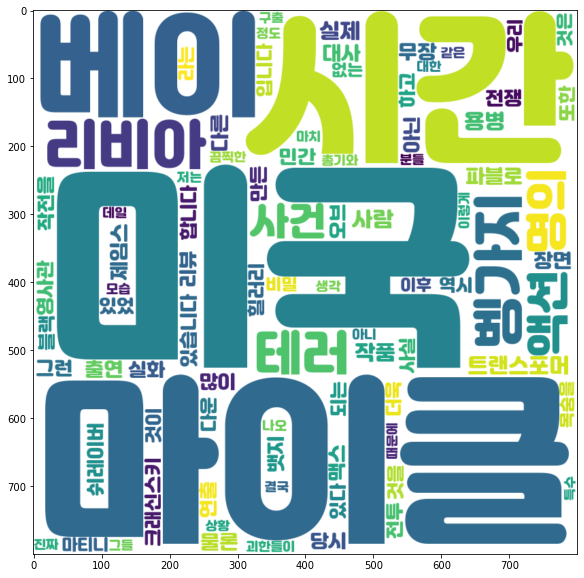

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

In [62]:
# Key-sentence extraction
from krwordrank.sentence import summarize_with_sentences

# texts는 짧은 문장 여러개 있는 게 좋음 (후기)
keywords, sents = summarize_with_sentences(texts, num_keywords=100, num_keysents=10)
# print(sents)

In [64]:
penalty=lambda x : 0 if (25 <= len(x) <= 80) else 1, # 영화라는 말을 제거하고 싶으면
keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.5, #값이 클수록 다양한 문장 선택
    num_keywords=100,
    num_keysents=10,
    verbose=False
)

print(sents)

['오늘 소개할 영화는 트랜스포머로 유명한 마이클 베이 감독이 연출했고 벵가지 습격으로 갇힌 명을 구하는 작전을 아주 긴박하게 묘사한 영화 아워스 더 시크릿 솔져스 오브 벵가지 이다 시간 감독 마이클 베이 출연 파블로 쉬레이버 존 크래신스키 제임스 뱃지 데일 맥스 마티니 개봉 미국 리뷰보기 년 월 일에 개봉했으나 우리나라에서는 조금 묻히지 않았나 싶다 솔직히 나도 생각하지 못하고 있다가 전쟁영화 목록에 뜨기에 살펴보다가 보게 됐는데 이걸 놓칠뻔했군 하는 안도의 한숨을 내쉬었다 마치 블랙호크 다운 이후의 만난 괜찮은 현대전 물이었다 평론가들 사이에는 이미지 쇄신을 위한 마이클 베이의 작품이다 연출은 그대로다 싶지만 영화는 영화 자체로 평가를 해야지 감독이 뭐 어쨌느니 스타일이 어쨌느니 이말 저말하는 것은 옳지 않다 그럼 지들이 찍던가 줄거리는 년 월 일 리비아에서 미국 대사관 습격 사건이 벌어지게 된다 미 대사관에 총기와 수류탄을 든 수십 명의 무장괴한들이 침입하고 평소에 보안은 엿으로 바꿔먹었고 뒤통수를 보여주던 대사관 직원들은 이들을 피해 숨게 되는데 이들을 구하려고 지부를 보호하기 위해 파견된 전직 군인 명의 특수 용병이 구출작전에 투입된다 사실 투입이라고 하지만 결국 보면 명령 불복종으로 튀어나간 거지만 아무튼 가서 전투 끝에 그들을 구출하게 되는데 자연스럽게 목표는 비밀 기지가 되었고 지원이 올 때까지 수 시간 동안 접전을 벌이게 된다 이 영화를 찍기 위해 마이클 베이 감독은 본부에도 드나들고 현장에 나가있는 사람들을 찾아 대화를 나누면서 심리적인 면과 아주 구체적인 장면들을 머릿속에 집어넣게 되었고 테러 현장에 있던 실존 인물들에게까지 도움을 청하는 등 엄청난 노력을 들였다 늘 부서지고 폭발하던 그의 영화에서 인물의 심리를 부각시키고 현실적인 전투 오히려 미국을 까는 부분 등 색다른 모습도 보여주었다 이 영화가 더욱 괜찮다고 느껴진 것은 바로 영화를 전체적으로 바라보는 시점이었다 블랙호크 다운에서는 분명한 주적이 있었다 한데 에서는 누가 미 대사관을 